In [2]:
# 数据处理
import pandas as pd
import numpy as np
import json
import csv
import random
import math
from itertools import product


# 网络分析与可视化
import networkx as nx
from networkx.readwrite import json_graph
from pyvis import network as net
import matplotlib.pyplot as plt
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α

In [3]:
def get_children(df, row_name):
    classes = set()
    for i, row in df.iterrows():
        classes.add(row[row_name])
    return classes


# 查看节点Degree分布
def NodeDegreeHist(G):
    # degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    # dmax = max(degree_sequence)
    # plt.hist(degree_sequence)
    # plt.show()
    degree = nx.degree_histogram(G)  # 返回图中所有节点的度分布序列
    x = range(len(degree))  # 生成X轴序列，从1到最大度
    y = [z / float(sum(degree)) for z in degree]  # 将频次转化为频率
    plt.scatter(x, y, s=1, color=(1, 0, 0))  # 绘制度分布
    plt.show()  # 显示图表


# 查看连接Weight分布
def EdgeWeightHist(G):
    weight_sequence = sorted([e['weight'] for u,v,e in G.edges(data=True)], reverse=True)
    dmax = max(weight_sequence)
    plt.hist(weight_sequence)
    plt.show()


# 查看全部节点在某个属性的所有选项
def NodeAttributeValueList(G,attribute):
    return set(np.array([G.nodes[n][attribute] for n in G.nodes]).flatten())


# 搜索满足某个属性值的所有节点
def NodeMatchByAttribute(G,attribute,value):
    nodes = []
    for n in G.nodes:
        if G.nodes[n][attribute]==value:
            nodes.append(n)
    return nodes

In [ ]:
# Neighbors / Path / Node Attributes ......

In [11]:
df_complete = pd.read_csv('01_Processed Data/Complete-Data.csv')
df_complete.head()

,Concept,Rel,Feature,Frequency,familiarity,concretness,上级类别,下级类别,coverage,cue_validity,categorical_distinctiveness
0,安全带,可以,可以-保护,27.096774,9.0,9.0,人造物,工具,0.851345,0.038320,0.158537
1,安全带,是,是-带子,22.258065,9.0,9.0,人造物,工具,0.851345,0.286019,0.012195
2,安全带,其他,其他-车,17.419355,9.0,9.0,人造物,工具,0.851345,0.122012,0.021341
3,安全带,是,是-安保的,16.451613,9.0,9.0,人造物,工具,0.851345,0.089938,0.041159
4,安全带,可以,可以-保护人,15.483871,9.0,9.0,人造物,工具,0.851345,0.149063,0.035061


In [4]:
with open('02_Graph/MasterConceptNetwork_Baseline-Test.json') as f:
    js_graph = json.load(f)
    G_MasterConceptNetwork = json_graph.node_link_graph(js_graph)

Node Degree Hist


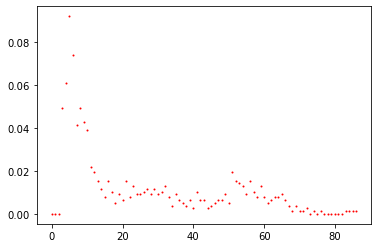

Edge Weight Hist


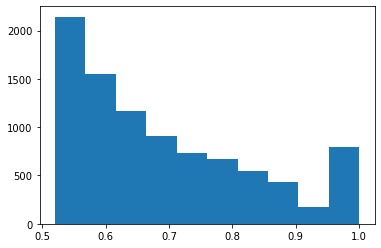

In [9]:
print("Node Degree Hist")
NodeDegreeHist(G_MasterConceptNetwork)
print("Edge Weight Hist")
EdgeWeightHist(G_MasterConceptNetwork)

In [5]:
for path in sorted(nx.all_simple_edge_paths(G_MasterConceptNetwork, '拇指', '老虎', cutoff=3)):
    print(path)

In [6]:
nx.multi_source_dijkstra(G_MasterConceptNetwork, {'轿车', '拇指'},'白菜', weight='weight')

(7.6214354038238525,
 ['轿车',
  '摩托车',
  '消防车',
  '消防栓',
  '水枪',
  '水',
  '纯净水',
  '白水',
  '冰红茶',
  '乌龙茶',
  '决明子',
  '谷子',
  '薄荷',
  '白菜'])

In [4]:
nx.single_source_dijkstra(G_MasterConceptNetwork, '白菜', weight='weight')

({'白菜': 0,
  '高粱': 0.5261947512626648,
  '冬瓜': 0.5265806913375854,
  '薄荷': 0.5438274145126343,
  '平菇': 0.545566201210022,
  '马齿苋': 0.5464589595794678,
  '香菇': 0.5484784245491028,
  '木耳': 0.5509825348854065,
  '油菜花': 0.5632195472717285,
  '草莓': 0.5674585103988647,
  '蘑菇': 0.5743358135223389,
  '刀豆': 0.5819211006164551,
  '南瓜': 0.5862823128700256,
  '西红柿': 0.5901736617088318,
  '秋葵': 0.5989903807640076,
  '土豆': 0.604301929473877,
  '大蒜': 0.6129992008209229,
  '豇豆': 0.6145817041397095,
  '豌豆': 0.6190148591995239,
  '莲藕': 0.6282387971878052,
  '草': 0.6355578303337097,
  '胡瓜': 0.6361868977546692,
  '山药': 0.6455909013748169,
  '灯笼椒': 0.6479686498641968,
  '香菜': 0.6583778858184814,
  '葱': 0.658927321434021,
  '茄子': 0.6733997464179993,
  '蚕豆': 0.6735966205596924,
  '荷兰豆': 0.6812830567359924,
  '黄瓜': 0.6837007403373718,
  '芋头': 0.6837283968925476,
  '玉米': 0.695863664150238,
  '毛豆': 0.6974912285804749,
  '洋葱': 0.6985612511634827,
  '丝瓜': 0.705400288105011,
  '西葫芦': 0.7118293642997742,
  '海白菜': 0

In [9]:
nx.bidirectional_dijkstra(G_MasterConceptNetwork,"白菜","机票",weight="weight")

(14.268395185470581,
 ['白菜',
  '薄荷',
  '谷子',
  '决明子',
  '乌龙茶',
  '冰红茶',
  '白水',
  '纯净水',
  '水',
  '水枪',
  '消防栓',
  '消防车',
  '吉普车',
  '行李车',
  '购物车',
  '针线篮',
  '坛子',
  '罐子',
  '瓶子',
  '漏斗',
  '清洁球',
  '猫砂',
  '便盆',
  '沟渠',
  '彩票',
  '机票'])

In [7]:
NodeAttributeValueList(G_MasterConceptNetwork,"maincategory")

{'交通工具', '人造物', '植物', '自然物', '身体部位', '食物'}

In [43]:

target = "七巧板"

target_maincategory = df_complete[df_complete['Concept']==target]['上级类别'].unique()[0]

nodes = []
for n in G_MasterConceptNetwork.nodes:
    if 'picture_naming_result' in G_MasterConceptNetwork.nodes[n]:
        if (G_MasterConceptNetwork.nodes[n]['maincategory']==target_maincategory) & (G_MasterConceptNetwork.nodes[n]['picture_naming_result']==True):
            nodes.append(n)

shortest_length = 1000
shortest_path = []

for node in nodes:
    path = nx.dijkstra_path(G_MasterConceptNetwork, node, target)
    if(len(path)<shortest_length):
        shortest_length = len(path)
        shortest_path = path
    subgraph = G_MasterConceptNetwork.subgraph(shortest_path)
    
print(json.dumps(json_graph.node_link_data(subgraph)))
    

{"directed": false, "multigraph": false, "graph": {"node_default": {}, "edge_default": {}}, "nodes": [{"subcategory": "\u5de5\u5177", "maincategory": "\u4eba\u9020\u7269", "degree_centrality": 0.12048192771084337, "pagerank": 0.224266068549885, "closeness_centrality": 0.40580595393987956, "laplacian_centrality": 0.03185693847159372, "clustering_coefficent": 0.4866023374393442, "cluster": 17, "betweenness_centrality": 0, "forceAtalasX": 1723.1423, "forceAtalasY": -1003.07477, "id": "\u9ed1\u677f"}, {"subcategory": "\u8fd0\u52a8\u5668\u6750", "maincategory": "\u4eba\u9020\u7269", "degree_centrality": 0.06024096385542169, "pagerank": 0.24636927957557916, "closeness_centrality": 0.33661582882850666, "laplacian_centrality": 0.008297034631485223, "clustering_coefficent": 0.21610699480950324, "cluster": 22, "betweenness_centrality": 0, "forceAtalasX": 1877.9299, "forceAtalasY": -926.1245, "id": "\u7bee\u677f"}, {"subcategory": "\u5de5\u5177", "maincategory": "\u4eba\u9020\u7269", "degree_cent

In [40]:
G_MasterConceptNetwork['安全带']['车窗']

{'weight': 0.6707421541213989, 'id': '2'}